### 결론부터... 
- 일단 ARIMA 는 기본적으로 단변량 예측모델
- 현업에서는 그냥 간단하게 Auto ARIMA 라이브러리 활용 

#### 시계열 분석을 위한 확률모형 
 

- 시계열 분석을 위한 확률모형은 데이터의 시간적 패턴 (추세변동, 계절변동 등)과 변동을 설명하는 통계적 방법
- 확률 모형이 시계열 데이터를 잘 추정했을 때 '잔차 시계열 자료 (residual error series) ' 는 백색잡음(white noise) 이 되어 서로 독립적이고 일정한 분산을 갖는다. (대게 정규분포를 따른다) 
- 이러한 컨셉에서 출발한 확률 모형들이 대표적으로 AR, MA, ARIMA, SARIMAX, VAR, ECM 등이 있다. 
- 확률모형의 분석은 4단계로 진행된다 : Box-Jenkins 방법론
1. 모형 설정 (Model Identification) : ACF, PACF 와 같은 지표, 혹은 auto.arima 와 같은 프로그램을 이용하여 시계열 자료에 '적합한' 확률모형을 선택한다 (AR/ARIMA/VAR 등 중에서 어떤 모형을 쓸지).
2. 모수 추정 (Parameter Estimation) : 설정한 모형에 따라 모수를 추정하고 적합성을 검토한다. 즉, 확률모형을 통한 시계열 예측은 특정한 모형을 가정한 뒤 파라미터를 찾는 '모수추정방식' 이다.
3. 분석 결과의 검정(Statistical Testing) : 모형 적합도에 따른 잔차의 정상성과 분석결과 검정을 수행
4. 예측(Forecasting) : 시계열 자료와 분석모형을 토대로 미래값을 예측

#### 자기상관 함수 (ACF: Auto Correlation Function)
 

- 특정 시차(lag)에서, 자기 상관관계를 측정하는 함수이다. ACF 값이 0에 가까우면 상관성이 없고, 값이 크면 특정 시차에서 강한 자기상관이 존재함을 의미.
- ACF 값을 통해 시계열 자료의 정상성을 파악한다. 정상 시계열의 경우 급격하게 0으로 빠르게 떨어지고, 비정상 시계열은 천천히 떨어진다.
- PCAF 는 비교하고자 하는 두시점외의 모든 변수의 영향을 제거한 상태에서 순수한 상관계수를 측정함
- 시계열 데이터의 정상성 여부는 ACF 와 PCAF 값이 특정 신뢰한계 범위 안에 존재하는지로 판단함
- ACF 와 PACF 의 목적은? 시계열 자료의 자기상관성 및 정상성을 판단하여 → 확률모형(ARIMA) 의 차수(p,d,q)를 선택하기 위함
시계열 데이터의 정상성만 간단히 검증하는 ADF 테스트와는 목적이 다르다고 할수있음

In [11]:
import pandas as pd
import numpy as np

ts = pd.read_csv("time_series.csv")

# 이동평균 값을 차분한 뒤 차분결과 시각화 및 ADF 테스트 
moving_avg = ts.rolling(6).mean()
ts_diff = ts - moving_avg
ts_diff.dropna(inplace=True) # first 6 is nan value due to window size


Text(0.5, 1.0, 'ACF & PACF')

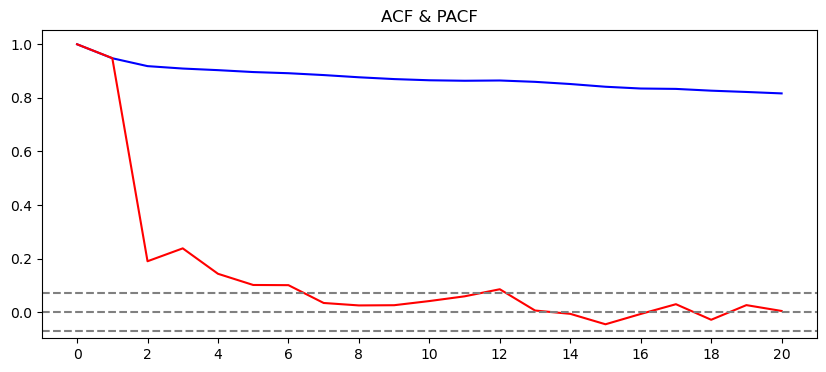

In [32]:
# ACF and PACF
from statsmodels.tsa.stattools import acf, pacf
import matplotlib.pyplot as plt

lag_acf = acf(ts, nlags=20)
lag_pacf = pacf(ts, nlags=20, method='ols')
# ACF
plt.figure(figsize=(10,4))
plt.plot(lag_acf, color='blue')
plt.plot(lag_pacf, color='red')
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_diff)),linestyle='--',color='gray')
plt.xticks(np.arange(0, len(lag_acf), 2))  # 1단위로 눈금 설정
plt.title('ACF & PACF')

#### 안정 시계열 - AR, MA, ARMA 
 
1. 자기회귀모델 (AR, AutoRegressive Model) 
- 변수 자기 자신의 과거값의 선형 조합으로 미래/현재 시점을 예측함
- AR(p) : p차 자기회귀 모형, ε 은 평균이 0이고 분산이 1인 정규분포 따르는 백색잡음

2. 이동평균 (MA, Moving Average)
- 과거시점의 예측 오차를 이용하여 미래/현재 시점을 예측함
- MA(q) : q차 이동평균 모형

3. 자기회귀 이동평균 (ARMA)
- 위에 두가지 모델을 합친 모형
- ARMA(1,1) = AR(1) + MA(1) : 가장 흔하게 쓰이는 차수. 차수가 올라간다고 결코 좋은건 아님

#### 불안정 시계열 - ARIMA

- 앞선 AR, MA, ARMA 모델을 사용하기 위해서는 시계열 데이터가 정상(stationary)상태여야한다. 그런데, 대부분의 시계열 데이터는 non-stationary 하다. 
- 따라서 비정상 시계열을 '차분'을 통해 stationary하게 바꿔준 뒤 ARMA 를 적용하는 방식이 ARIMA 이다. 
- ARIMA(p, d, q) : d차 차분한 데이터에 AR(p) 모형과 MA(q) 모형을 합친 모형
- p, d, q 값은 AIC/BIC (AIC/BIC 는 낮을수록 좋다), ACF/PACF 그리고 경험적인 자기상관 등 다양한 방법을 통해서 선택할 수 있다.
- 일반적으로는 ACF 와 PACF 그래프를 그려서 자기상관을 확인하고, 적합한 ARIMA 모형을 가정할 수 있다. 위의 ACF/PACF 그래프 예시로 돌아가보면, PCAF 를 통해 p =6 , ACF 를 통해 p=3 으로 정해볼 수 있다. 

In [ ]:
# ARIMA LİBRARY : p,d,q 를 수동으로 정해서 예측하는 경우

from statsmodels.tsa.arima.model import ARIMA
from datetime import datetime
# fit model
model = ARIMA(ts, order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit()
# predict
start_index = 700  # 시점이 날짜 형식인 경우는, start_index = datetime(1944, 6, 25)
end_index = 750
forecast = model_fit.predict(start=start_index, end=end_index) # start=start_index, end=end_index

# forecast 값과, 기존데이터(ts) 를 이용해 시각화 비교 및 MSE, MAPE 등의 지표를 통한 오차 측정 가능함.

#### Auto ARIMA 라이브러리

- 사실 현업에서 사용한다면 위의 과정들을 생략하고 Auto ARIMA  라이브러리를 활용하는게 편함.
- Auto ARIMA 를 활용하여 arima 모델을 생성하고 피팅하는 방법은 아래와 같음.
- ARIMA (0,1,0) 모형이 AIC점수가 제일 낮아 best model 로 선정되었음을 알 수 있다. 

In [20]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(ts, test_size = 0.2, random_state=11)
print(train.shape, test.shape)

(600, 1) (151, 1)


In [22]:
import pmdarima as pm
from pmdarima.arima import ndiffs

# ndiffs 함수를 사용하여 필요한 차분의 횟수를 구하기
d_kpss = ndiffs(train, alpha=0.05, test='kpss', max_d=6)
d_adf = ndiffs(train, alpha=0.05, test='adf', max_d=6)
print(d_kpss, d_adf)

0 0


c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\bmseo\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
c:\Users\b

In [28]:
import warnings
warnings.filterwarnings("ignore")


model = pm.auto_arima(y = train       # 데이터
                      , d = 1           # (d)차분 차수 (기본값 = none), 지정하지 않으면 실행 기간이 매우 길어질 수 있음
                      , start_p = 0     # (p)탐색 시초값 (기본값 = 2)
                      , max_p = 3       # (기본값 = 5)
                      , start_q = 0     # (q)탐색 시초값 (기본값 = 2)
                      , max_q = 3       # (기본값 = 5)
                      , m = 1           # (기본값 = 1)
                      , seasonal = False # 기본값 = True, 계절변동 ARIMA(SARIMA)에 해당시 True로 수정
                      , stepwise = True
                      , trace=True
                      , silent=True      # stepwise로 모델을 적합할 때마다 결과를 프린트
                      )
                      
model.fit(train)   

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3878.786, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3738.075, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3876.786, Time=0.01 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3679.013, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=3621.217, Time=0.05 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.58 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=3619.220, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=3677.014, Time=0.04 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=inf, Time=0.33 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.37 sec

Best model:  ARIMA(3,1,0)(0,0,0)[0]          
Total fit time: 2.404 seconds


' 결과 예시 \nPerforming stepwise search to minimize aic\n ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=1.18 sec\n ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=632.062, Time=0.03 sec\n ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=633.161, Time=0.08 sec\n ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=632.943, Time=0.11 sec\n ARIMA(0,1,0)(0,0,0)[0]             : AIC=630.345, Time=0.05 sec\n ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=633.865, Time=0.35 sec\n\nBest model:  ARIMA(0,1,0)(0,0,0)[0]          \nTotal fit time: 1.829 seconds '

피팅된 ARIMA 모델의 결과는 model.summary() 를 통해 표로 볼 수 도 있지만, 아래와 같이 시각화해서 볼 수 있다. 

- 1번 플랏 = 잔차의 정상성. 모델을 피팅한 뒤엔 항상 처음으로 잔차의 정상성을 확인해야한다. 
- 2,3번 플랏 = 잔차가 정규분포와 얼마나 비슷한지.. skew 와 kurtosis 가 어느정도 있는것은 괜찮다. 시계열 데이터의 특징
- 4번 플랏 = ACF 그래프 

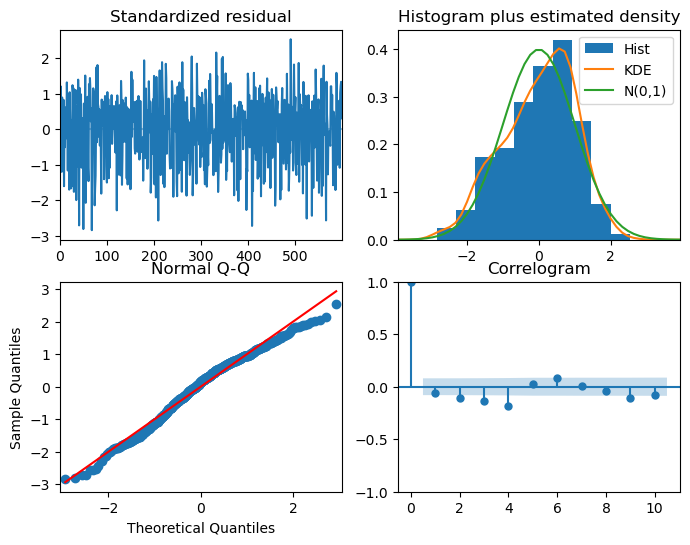

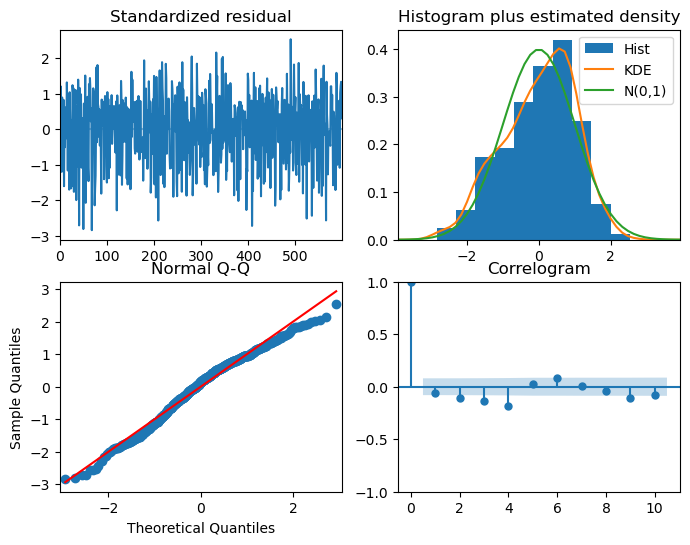

In [33]:
model.plot_diagnostics(figsize=(8, 6))